# winter 2022 week03

## goals:

reload the data
run util/load_data.py convert_all() function -- which loads everything and converts it to parquet

## todo
- 


## notes:



In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
cd /Users/brendan/Documents/mpa_project/gfw_research

/Users/brendan/Documents/mpa_project/gfw_research


In [4]:
import numpy as np
import pandas
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pywdpa
import geopandas
import contextily as ctx
from shapely import geometry
from shapely import ops
import pretty_html_table

import util

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

/opt/homebrew/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [5]:
DATA_PATH = "/Users/brendan/Documents/mpa_project/gfw_research/data/"
FILENAME = "mpatlas_20201223_clean/mpatlas_20201223_clean.shp"

import util

#mpas = geopandas.read_file(DATA_PATH + FILENAME)
# util.load_mpatlas_mpas()
mpas = geopandas.read_parquet("data/mpas/mpatlas.parquet")

In [6]:
def load_year(year):
    year = str(year)
    print(f'\r reading year {year}', end='')
    return pandas.read_parquet("data/points/" + year + ".parquet")

In [7]:
points_by_year = {
    year : load_year(year)
    for year in range(2012, 2021)
}


 reading year 2020

In [9]:
# sample the points here before converting to geo
# use the sampled points to find the mmsi that are interesting
# only then should we get all of the points of relevent mmsi

SAMPLE_RATIO = 50
points_sampled = []
for year, points in points_by_year.items():
    print(f'\rsampling {str(year)}... ', end='')
    points_sampled.append(points.sample(frac=1/SAMPLE_RATIO))
print('done.')
points_sampled = pandas.concat(points_sampled)
print("converting to geo...  ", end='')
geopoints_sampled = util.convert_to_geo(points_sampled, box=True)
print("done.")


sampling 2020... done.
converting to geo...  done.


/opt/homebrew/Cellar/jupyterlab/3.2.8/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3191: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Text(0.5, 1.0, 'fishing hours inside mpas 2012-2016 in 0.1 degree aggregate')

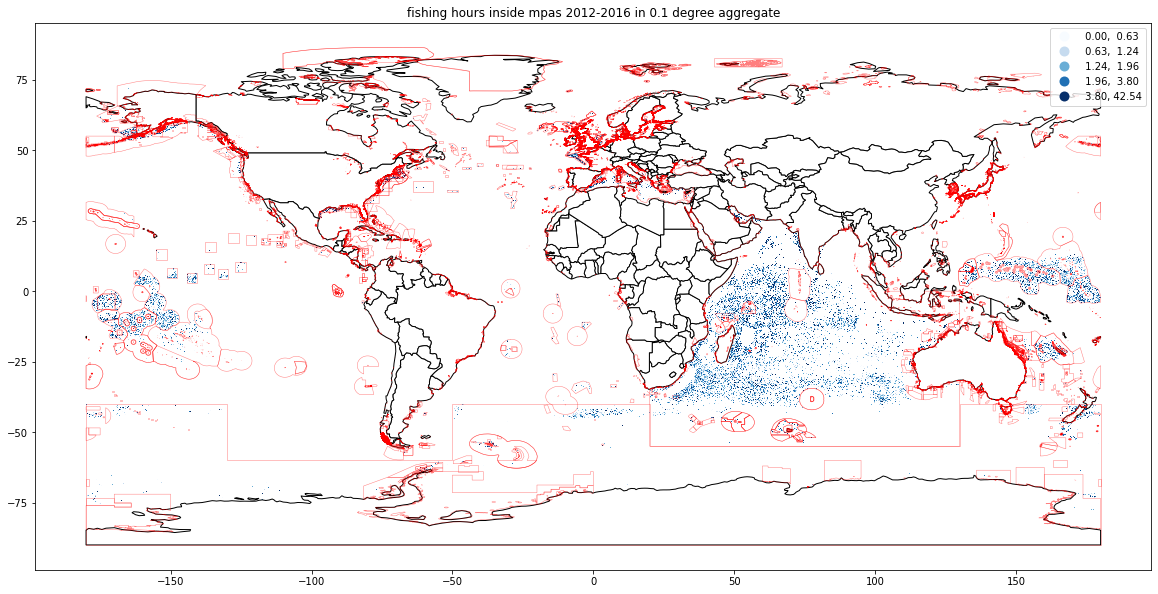

In [11]:
## Trying to recreate some week 6 tables and plots
#
geopoints = geopoints_sampled
joined_points = geopandas.sjoin(geopoints, mpas, predicate='within')

## Plot
ax = joined_points.plot(column='fishing_hours', figsize=(20, 30), markersize=1, cmap='Blues', scheme='quantiles', legend=True)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='black', ax=ax, )

LINEWIDTH = 0.5
mpas.plot(ax=ax, color='None', edgecolor='red', linewidth=LINEWIDTH, alpha=0.5)

plt.title('fishing hours inside mpas 2012-2016 in 0.1 degree aggregate')

In [ ]:
"""Actual good ones:
- Natural Park of the Coral Seas, 2014 555577562, further off the east coast of Australia
- Marae Moana/Cook Islands, 2017 555624907 - maybe the best one - middle of the Pacific
- French Austral Lands and Seas, 2019 555697868 - south-east of Africa
- Arquipélago Submarino Do Meteor, 2016 555514087 - Atlantic ocean Y shaped area
- Coral Sea, 2018 555556875 just off the east coast of Australia
- Pacífico Mexicano Profundo, 2018 555624307 southwest Mexican coast
- Palau National Marine Sanctuary, 2015, 555622118 oceania (near indonesia, phillippines)
"""

# TODO - enter the dates, figure out how to consolidate the multiple-entry ones
mpas_of_interest = [
    ("Marae Moana", 555624907.0, "2017-07-13"),
    ("French Austral Lands and Seas", 555697868, "2019-01-01"), # date is kind of a guess
    ("Arquipélago Submarino Do Meteor", 555697868, "2016-01-01"), # date is rough
    ("Coral Sea", 555556875, "2018-07-01"), # wikipedia
    ("Pacífico Mexicano Profundo", 555624307, "2016-07-12"), 
    ("PIPA", 555512002, "2015-01-01"),
]


In [ ]:
import util
pipa = mpas[mpas['wdpa_id'] == 555512002.0]

pipa_res = util.analyze_mpa(geopoints_sampled, points_by_year, pipa, '2015-01-01')

In [ ]:
import util
pitcairn = mpas[mpas['wdpa_id'] == 555624172.0]
pitcairn_results = util.analyze_mpa(geopoints_sampled, points_by_year, pitcairn, "2017-06-01")